Overview
========

To analyze piano sounds in Python, we will use `librosa` for audio analysis, `scipy` for signal processing (like FFT), and `matplotlib` for visualization, allowing us to extract features like pitch, rhythm, and spectral information

- [__librosa__](https://github.com/librosa/librosa): A powerful library for music and audio analysis, offering functions for loading audio files, extracting features, and performing various analyses.
- [__scipy__](https://scipy.org/): Provides tools for scientific computing, including signal processing techniques like the Fast Fourier Transform (FFT)
- [__matplotlib__](https://matplotlib.org/): A library for creating visualizations, allowing you to plot waveforms, spectrograms, and other audio analysis results.

In [1]:
import librosa
import librosa.display
import matplotlib.pyplot as plt
import numpy as np
import urllib.request

To download a file from a URL using Python, we utilize the `urllib.request` module:

In [2]:
def download_music(url: str, file_path: str):
    try:
        urllib.request.urlretrieve(url, file_path)
        print(f"File downloaded successfully to {file_path}")
    except Exception as e:
        print(f"An error occurred: {e}")

download_music(
    "https://upload.wikimedia.org/wikipedia/commons/0/06/Robert_Schumann_-_scenes_from_childhood%2C_op._15_-_vii._dreaming.ogg",
    "./Kinderszenen-Träumerei.ogg"
)

File downloaded successfully to ./Kinderszenen-Träumerei.ogg


We then use `librosa.load()` to load audio files into a numerical representation (e.g., a waveform)

In [3]:
def load_audio(audio_path: str):
    return librosa.load(audio_path)

y, sr = load_audio("Kinderszenen-Träumerei.ogg")

and plot it:

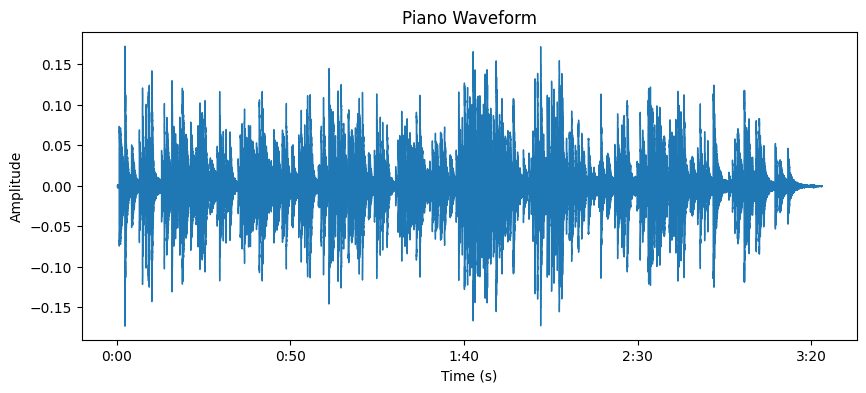

In [4]:
plt.figure(figsize=(10, 4))
librosa.display.waveshow(y, sr=sr, axis='time')
plt.title('Piano Waveform')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.show()

Apply the Fast Fourier Transform (FFT) to convert the audio signal from the time domain to the frequency domain, revealing the frequencies present in the sound

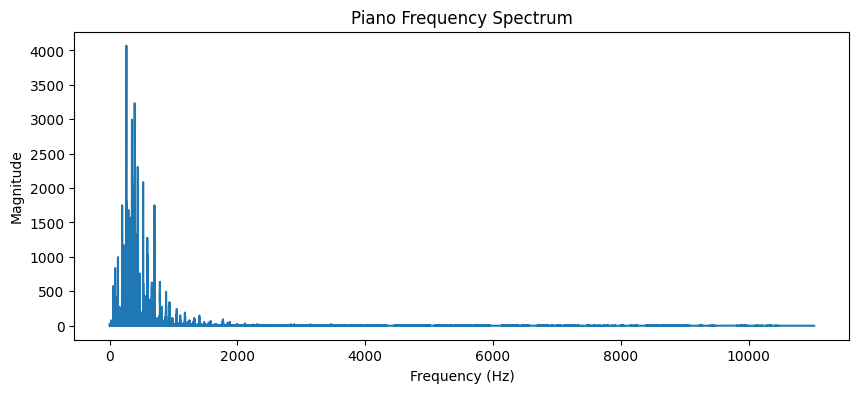

In [5]:
def fast_fourier_transform(y, sr):
    frequencies = np.fft.fftfreq(len(y), d=1/sr)
    fft_values = np.fft.fft(y)
    return frequencies, fft_values

frequencies, fft_values = fast_fourier_transform(y, sr)

plt.figure(figsize=(10, 4))
plt.plot(frequencies[:len(fft_values)//2], np.abs(fft_values[:len(fft_values)//2]))
plt.title('Piano Frequency Spectrum')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')
plt.show()

Now let's plot the frequency spectrums of all 13 pieces of [Kinderszenen](https://en.wikipedia.org/wiki/Kinderszenen):

File downloaded successfully to Von-fremden-Ländern-und-Menschen.ogg


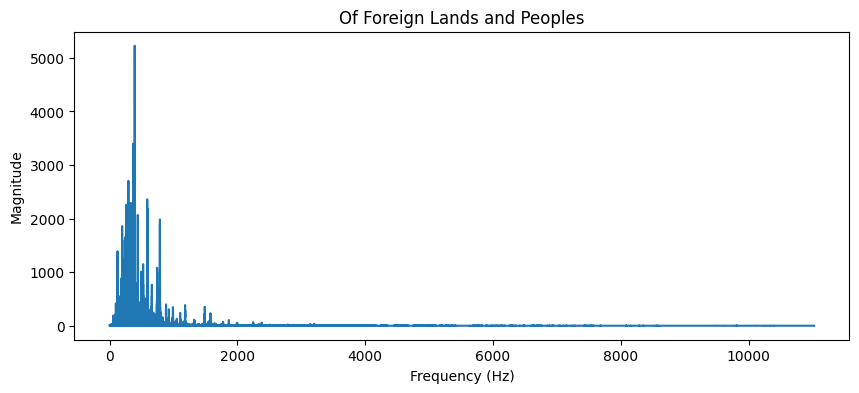

File downloaded successfully to Kuriose-Geschichte.ogg


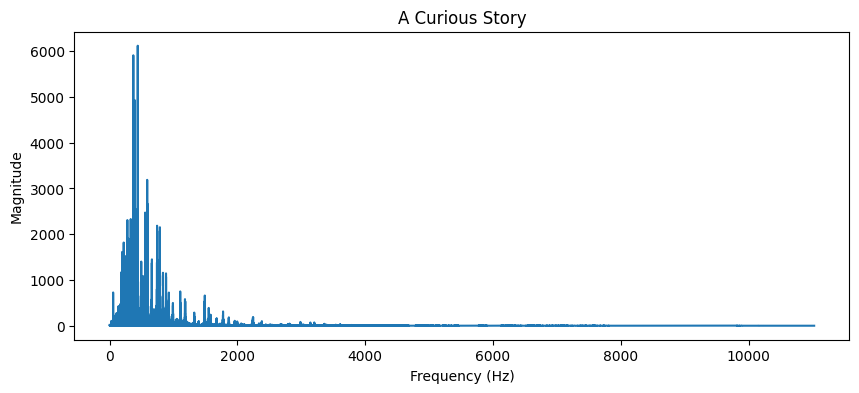

File downloaded successfully to Hasche-Mann.ogg


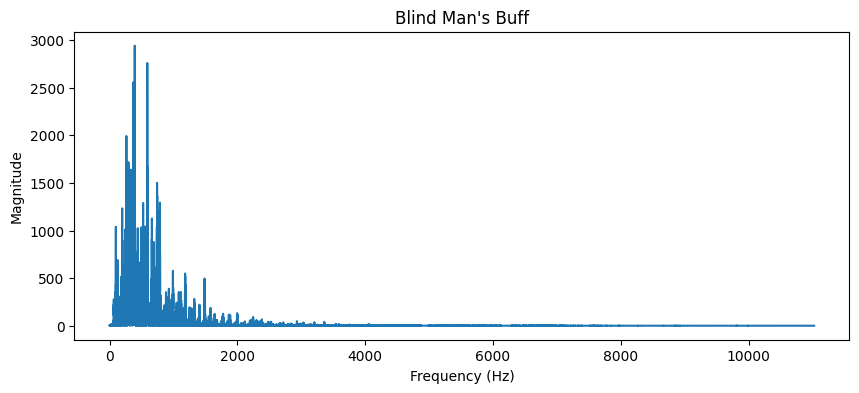

File downloaded successfully to Bittendes-Kind.ogg


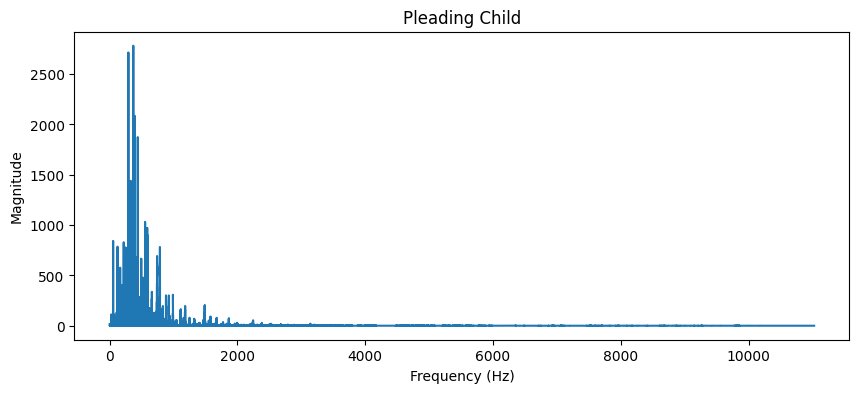

File downloaded successfully to Glückes-genug.ogg


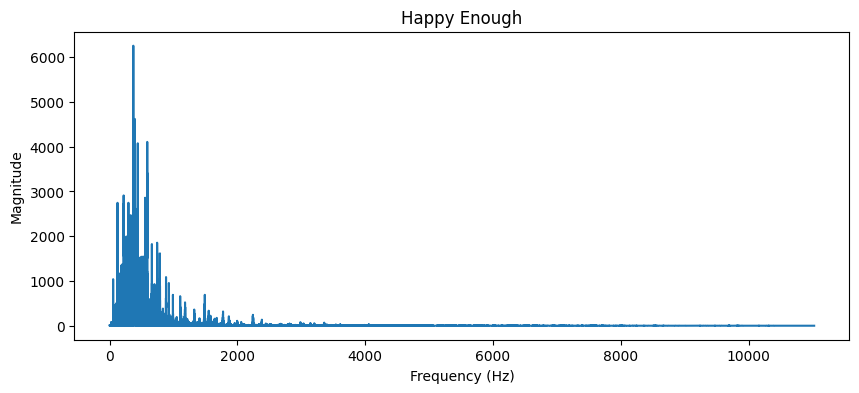

File downloaded successfully to Wichtige-Begebenheit.ogg


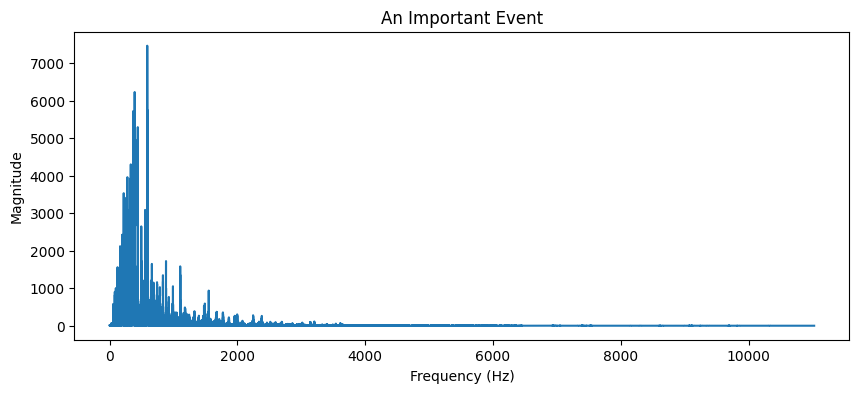

File downloaded successfully to Träumerei.ogg


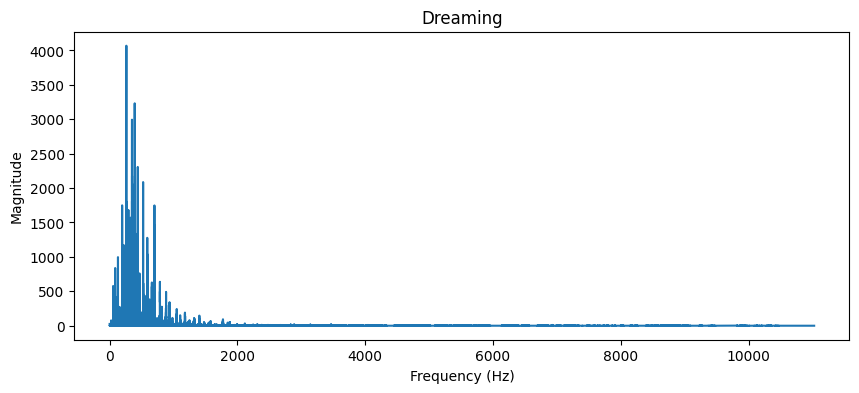

File downloaded successfully to Am-Kamin.ogg


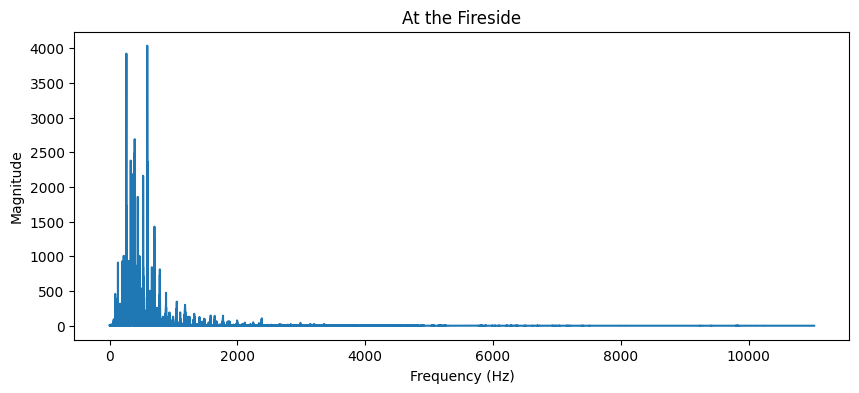

File downloaded successfully to Ritter-vom-Steckenpferd.ogg


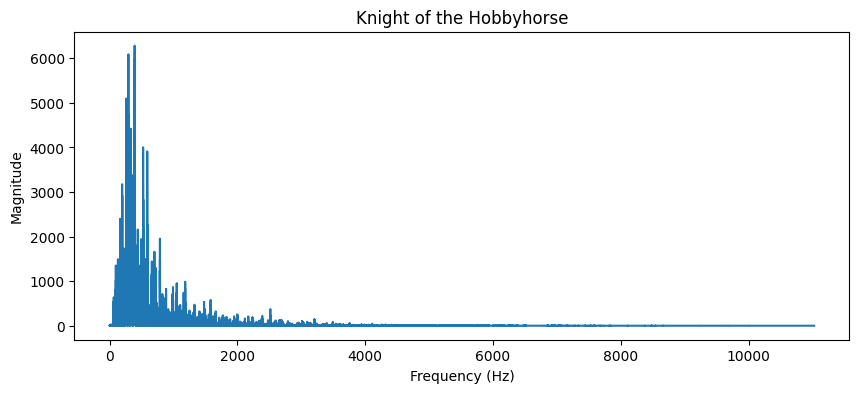

File downloaded successfully to Fast-zu-ernst.ogg


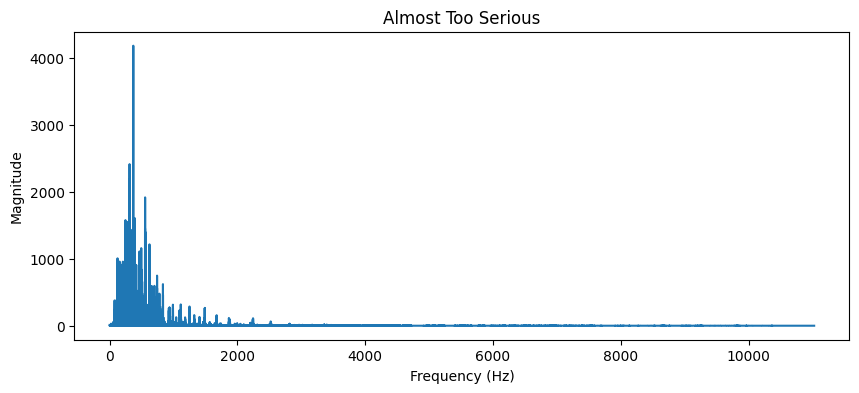

File downloaded successfully to Fürchtenmachen.ogg


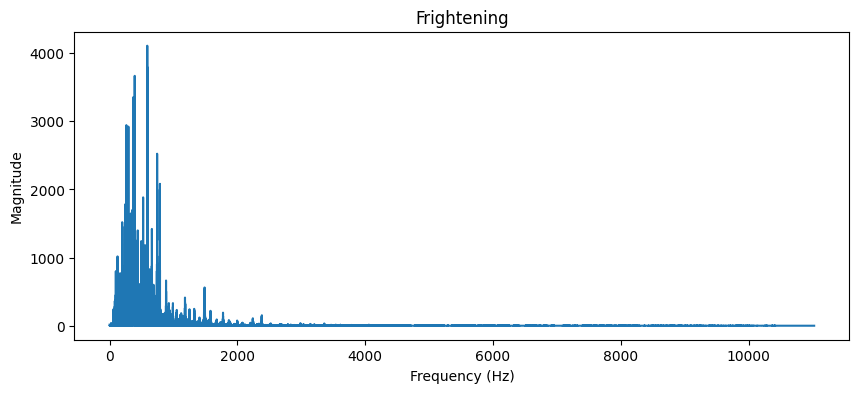

File downloaded successfully to Kind-im-Einschlummern.ogg


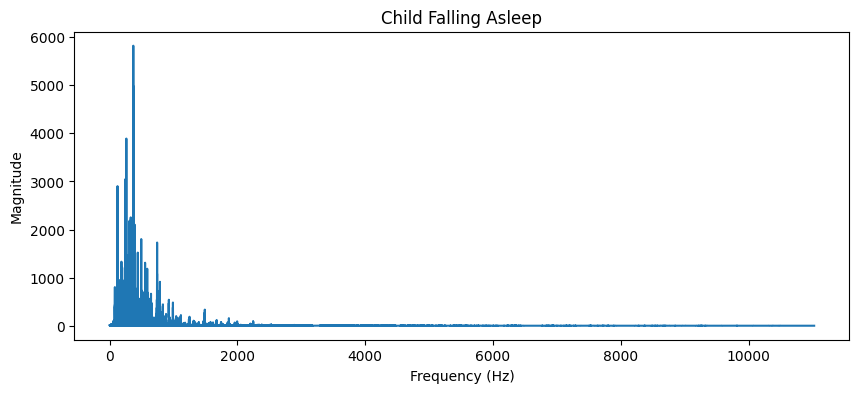

File downloaded successfully to Der-Dichter-spricht.ogg


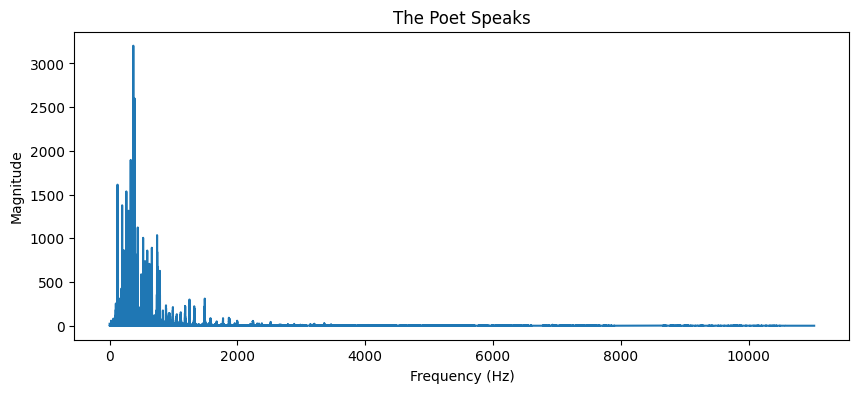

In [6]:
kinderszenen = [
    {
        "German title": "Von fremden Ländern und Menschen",
        "English title": "Of Foreign Lands and Peoples",
        "Audio URL": "https://upload.wikimedia.org/wikipedia/commons/c/ce/Robert_Schumann_-_scenes_from_childhood%2C_op._15_-_i._of_foreign_lands_and_peoples.ogg" 
    },
    {
        "German title": "Kuriose Geschichte",
        "English title": "A Curious Story",
        "Audio URL": "https://upload.wikimedia.org/wikipedia/commons/2/2d/Robert_Schumann_-_scenes_from_childhood%2C_op._15_-_ii._a_curious_story.ogg"
    },
    {
        "German title": "Hasche-Mann",
        "English title": "Blind Man's Buff",
        "Audio URL": "https://upload.wikimedia.org/wikipedia/commons/b/b3/Robert_Schumann_-_scenes_from_childhood%2C_op._15_-_iii._blind_man%27s_buff.ogg"
    },
    {
        "German title": "Bittendes Kind",
        "English title": "Pleading Child",
        "Audio URL": "https://upload.wikimedia.org/wikipedia/commons/4/49/Robert_Schumann_-_scenes_from_childhood%2C_op._15_-_iv._pleading_child.ogg"
    },
    {
        "German title": "Glückes genug",
        "English title": "Happy Enough",
        "Audio URL": "https://upload.wikimedia.org/wikipedia/commons/0/04/Robert_Schumann_-_scenes_from_childhood%2C_op._15_-_v._happiness.ogg"
    },
    {
        "German title": "Wichtige Begebenheit",
        "English title": "An Important Event",
        "Audio URL": "https://upload.wikimedia.org/wikipedia/commons/1/14/Robert_Schumann_-_scenes_from_childhood%2C_op._15_-_vi._an_important_event.ogg"
    },
    {
        "German title": "Träumerei",
        "English title": "Dreaming",
        "Audio URL": "https://upload.wikimedia.org/wikipedia/commons/0/06/Robert_Schumann_-_scenes_from_childhood%2C_op._15_-_vii._dreaming.ogg"
    },
    {
        "German title": "Am Kamin",
        "English title": "At the Fireside",
        "Audio URL": "https://upload.wikimedia.org/wikipedia/commons/0/0a/Robert_Schumann_-_scenes_from_childhood%2C_op._15_-_viii._at_the_fireside.ogg"
    },
    {
        "German title": "Ritter vom Steckenpferd",
        "English title": "Knight of the Hobbyhorse",
        "Audio URL": "https://upload.wikimedia.org/wikipedia/commons/7/78/Robert_Schumann_-_scenes_from_childhood%2C_op._15_-_ix._knight_of_the_hobbyhorse.ogg"
    },
    {
        "German title": "Fast zu ernst",
        "English title": "Almost Too Serious",
        "Audio URL": "https://upload.wikimedia.org/wikipedia/commons/5/5a/Robert_Schumann_-_scenes_from_childhood%2C_op._15_-_x._almost_too_serious.ogg"
    },
    {
        "German title": "Fürchtenmachen",
        "English title": "Frightening",
        "Audio URL": "https://upload.wikimedia.org/wikipedia/commons/f/f9/Robert_Schumann_-_scenes_from_childhood%2C_op._15_-_xi._frightening.ogg"
    },
    {
        "German title": "Kind im Einschlummern",
        "English title": "Child Falling Asleep",
        "Audio URL": "https://upload.wikimedia.org/wikipedia/commons/f/fa/Robert_Schumann_-_scenes_from_childhood%2C_op._15_-_xii._child_falling_asleep.ogg"
    },
    {
        "German title": "Der Dichter spricht",
        "English title": "The Poet Speaks",
        "Audio URL": "https://upload.wikimedia.org/wikipedia/commons/4/42/Robert_Schumann_-_scenes_from_childhood%2C_op._15_-_xiii._the_poet_speaks.ogg"
    },
]

def plot_frequency_spctrums(pieces):
    for idx, piece in enumerate(pieces):
        file_name = piece["German title"].replace(" ", "-") + ".ogg"
        
        download_music(piece["Audio URL"], file_name)
        y, sr = load_audio(file_name)
        frequencies, fft_values = fast_fourier_transform(y, sr)
    
        plt.figure(figsize=(10, 4))
        plt.plot(frequencies[:len(fft_values)//2], np.abs(fft_values[:len(fft_values)//2]))
        plt.title(piece["English title"])
        plt.xlabel('Frequency (Hz)')
        plt.ylabel('Magnitude')
        plt.show()

plot_frequency_spctrums(kinderszenen)

File downloaded successfully to Adagio---Vivace-assai.ogg


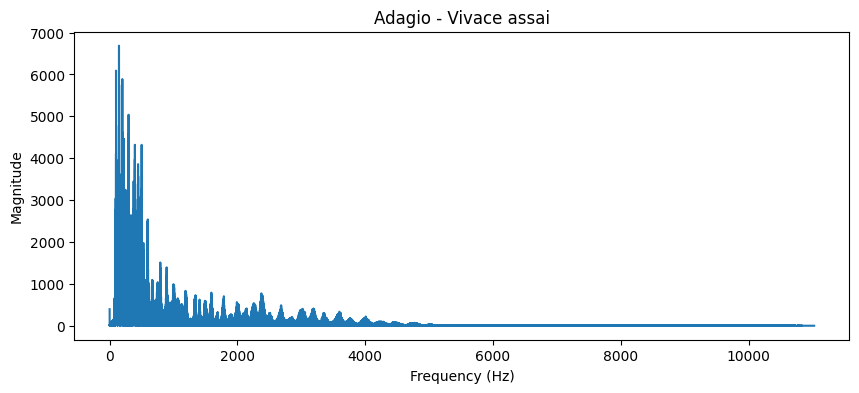

In [7]:
symphony_94 = [
    {
        "German title": "Adagio - Vivace assai",
        "English title": "Adagio - Vivace assai",
        "Audio URL": "https://upload.wikimedia.org/wikipedia/commons/0/08/Haydn%3B_Symphony_No._94_%22Surprise%22%2C_1._Adagio_%E2%80%93_Vivace_assai.ogg" 
    }
]

plot_frequency_spctrums(symphony_94)